In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

what is ``torch.nn`` ->  https://pytorch.org/docs/stable/nn.html#pooling-layers

In [2]:
torch.__version__

'2.1.2+cpu'

| Topic	   | Contents |
|----------|----------|
| 1. Getting data read | Data can be almost anything but to get started we're going to create a simple straight line  | 
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.   | 
|3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
|4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
|5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that.
|6. Putting it all together | Let's take all of the above and combine it.


### 1. Data (preparing and loading)


In [3]:
weight = 0.89
bias = 0.2

In [4]:
X = torch.arange(start= 0, end= 1, step= 0.01).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.2000],
         [0.2089],
         [0.2178],
         [0.2267],
         [0.2356],
         [0.2445],
         [0.2534],
         [0.2623],
         [0.2712],
         [0.2801]]))

In [5]:
len(X), len(y)

(100, 100)

### Split data into training and test sets


In [6]:
train_split = int(0.8 * len(X))
train_split

80

In [7]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
print(f"X train size: {len(X_train)}")
print(f"X test size: {len(X_test)}")
print(f"y train size: {len(y_train)}")
print(f"y test size: {len(y_train)}")


X train size: 80
X test size: 20
y train size: 80
y test size: 80


In [22]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(5, 5))

  plt.scatter(train_data, train_labels, c="b", s=6, label="Training data")
  
  plt.scatter(test_data, test_labels, c="g", s=6, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10});

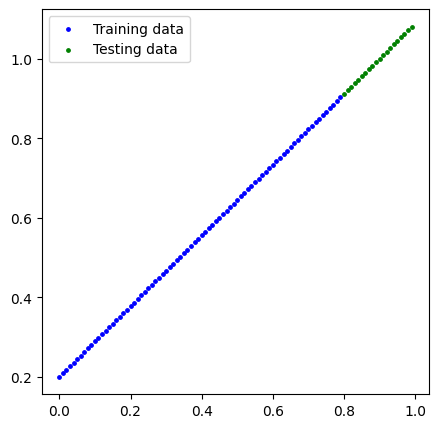

In [30]:
plot_predictions()
plt.savefig("grafik")

``torch parameter`` -> https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter

In [35]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad= True,
                                            dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [37]:
torch.manual_seed(42) # random state

new_model = LinearRegressionModel()
list(new_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [38]:
new_model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])